In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

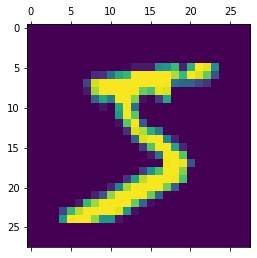

In [9]:
plt.matshow(X_train[0])

In [11]:
y_train[0]

5

In [12]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [13]:

print(X_train.shape)

(60000, 28, 28)


In [24]:
#to increase accuracy

X_train=X_train/255
X_test=X_test/255

In [25]:
#how do flatten with pandas

X_train.reshape(len(X_train),28*28)
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [26]:
#Now train the model with keras

model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(28*28,),activation='sigmoid')                    
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4702 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9260


In [27]:
#Evaluate our model
model.evaluate(X_test_flattened, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.2722 - accuracy: 0.9226


[0.27222418785095215, 0.9225999712944031]

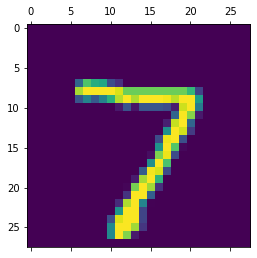

In [28]:
#check the first image of test dataset
plt.matshow(X_test[0])

In [30]:
y_predicted = model.predict(X_test_flattened)

In [31]:
#check the first image probablity percentage of test dataset in every percentage of 10 output neuron
y_predicted[0]

array([2.3242712e-02, 4.3697298e-07, 5.9102982e-02, 9.6003008e-01,
       1.9462407e-03, 1.3534519e-01, 1.4714403e-06, 9.9976391e-01,
       1.0705760e-01, 6.6624331e-01], dtype=float32)

In [36]:
#show the percentage of max print(np.argmax(y_predicted[0]),np.max(y_predicted[0]))
np.argmax(y_predicted[0])

7

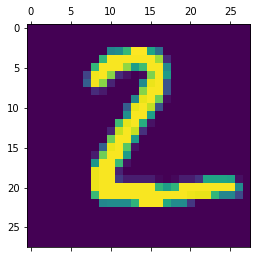

In [39]:
plt.matshow(X_test[1])

In [40]:
#check another test
np.argmax(y_predicted[1])

2

In [43]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[0:10]


[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [44]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [45]:
#confusion matrix describe the number of error and right value
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    5,    5,    3,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,   11,  894,   32,    6,    4,   13,   13,   50,    3],
       [   1,    0,    6,  945,    0,   16,    2,   11,   23,    6],
       [   1,    1,    2,    1,  901,    0,   13,    5,   10,   48],
       [   7,    2,    1,   55,    8,  758,   14,    6,   34,    7],
       [  10,    3,    5,    2,    7,   13,  913,    2,    3,    0],
       [   1,    7,   19,   10,    4,    0,    0,  955,    3,   29],
       [   6,    8,    5,   33,    9,   25,    8,   11,  862,    7],
       [  11,    7,    1,   11,   17,    6,    0,   24,    7,  925]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

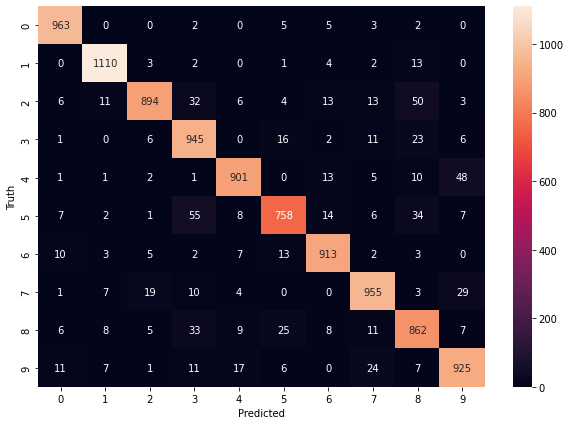

In [47]:
#see it in colored using seaborn library

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
#to improve accuracy add hidden layer
model = keras.Sequential([
    keras.layers.Dense(150,input_shape=(28*28,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')                     
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2467 - accuracy: 0.9298
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1073 - accuracy: 0.9686
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0734 - accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0536 - accuracy: 0.9843
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0419 - accuracy: 0.9873


In [53]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9781


[0.06898130476474762, 0.9781000018119812]

In [57]:
#Okay, Let's Work in different angle 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')                     
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2546 - accuracy: 0.9263
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1108 - accuracy: 0.9673
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0747 - accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0555 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0435 - accuracy: 0.9865
